# Text Analysis of Amazon Grocery_and_Gourmet_Food Product Reviews.

###### Name : Manimadhuri Edara
###### GitHub profile: https://github.com/MANIMADHURIE
###### LinkedIn progile: https://www.linkedin.com/in/manimadhuriedara/

The Amazon Grocery_and_Gourmet_Food Reviews dataset consists of reviews of Grocery_and_Gourmet foods from Amazon. The data span a period of more than 10 years, including all ~500,000 reviews. Reviews include product and user information, ratings, and a plaintext review.

<img src="https://assets.aboutamazon.com/dims4/default/e1f08b0/2147483647/strip/true/crop/1279x720+0+0/resize/1320x743!/format/webp/quality/90/?url=https%3A%2F%2Famazon-blogs-brightspot.s3.amazonaws.com%2Ff5%2F9f%2F43fe106c4a5081e7a696ef0a8fa8%2Ffresh-1280x7201.jpg" width="400">

##### Source of the Dataset : https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

##### Necessary frameworks

In [20]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computing
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Enhanced data visualization
from tabulate import tabulate  # Tabular data formatting
import os  # Operating system utilities
import nltk  # Natural Language Toolkit for text processing
import re  # Regular expressions for text manipulation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization
from sklearn.preprocessing import StandardScaler  # Data scaling
from tqdm import tqdm  # Progress bars
from sklearn.manifold import TSNE  # Dimensionality reduction
from imblearn.over_sampling import RandomOverSampler, SMOTE  # Imbalanced data handling
from sklearn.metrics import accuracy_score, f1_score, classification_report  # Evaluation metrics
from sklearn.model_selection import cross_val_score  # Cross-validation
from sklearn.metrics import confusion_matrix  # Confusion matrix
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.decomposition import TruncatedSVD, PCA  # Dimensionality reduction techniques
from transformers import BertTokenizer, AutoTokenizer  # Transformers for NLP
import pandas_profiling as pdp  # Pandas profiling for data exploration

## **Data Cleaning & Analysis**

In [21]:
def explore_dataset(data, data_filename=None):
    """
    We learn every detail listed below in the explore_dataset method:
    - Shape of dataset
    - Column names that exist in dataset
    - checking for Missing values 
    - Overall information about dataset using info() method
    - Datatypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(data.isnull().sum())
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [22]:
filename = "dataset_Grocery_and_Gourmet_Food.csv"
df = pd.read_csv(filename)

In [23]:
# lets check the information of dataset
explore_dataset(df,filename)

			EDA Dataset: dataset_Grocery_and_Gourmet_Food.csv
Total Rows: 151254

Total Columns: 9

Columns: ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']

Total Null Values: 1515
reviewerID           0
asin                 0
reviewerName      1493
helpful              0
reviewText          22
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      151254 non-null  object 
 1   asin            151254 non-null  object 
 2   reviewerName    149761 non-null  object 
 3   helpful         151254 non-null  object 
 4   reviewText      151232 non-null  object 
 5   overall         151254 non-null  float64
 6   summary        

In [24]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"


In [25]:
# Convert 'reviewTime' column to datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

In [26]:
print("\nDtype of all Columns")
print(df.dtypes)


Dtype of all Columns
reviewerID                object
asin                      object
reviewerName              object
helpful                   object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
dtype: object


#### Cleansing: Missing values

In [27]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      1493
helpful              0
reviewText          22
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [28]:
# Check for missing values
total_missing = df.isnull().sum()

In [29]:
# Display the columns with missing values
print("Columns with Missing Values:")
print(total_missing[total_missing > 0])

Columns with Missing Values:
reviewerName    1493
reviewText        22
dtype: int64


In [30]:
# Imputing Missing Values with appropriate placeholders.

df['reviewerName'].fillna('Unknown', inplace=True)
df['reviewText'].fillna('No review available', inplace=True)

In [31]:
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

#### Cleansing: Duplicate Rows

In [32]:
duplicate_count = df.duplicated().sum()

In [33]:
print(f"Count of duplicate rows: {duplicate_count}")

Count of duplicate rows: 0


#### Statistical summary

In [34]:
summary = df.describe()
summary

,overall,unixReviewTime
count,151254.000000,1.512540e+05
mean,4.243042,1.342909e+09
std,1.090003,5.375634e+07
min,1.000000,9.657792e+08
25%,4.000000,1.315440e+09
50%,5.000000,1.360368e+09
75%,5.000000,1.383955e+09
max,5.000000,1.406074e+09


In [35]:
Overall_rating = df['overall'].value_counts().reset_index()
Overall_rating

,index,overall
0,5.0,87446
1,4.0,32598
2,3.0,17514
3,2.0,7917
4,1.0,5779


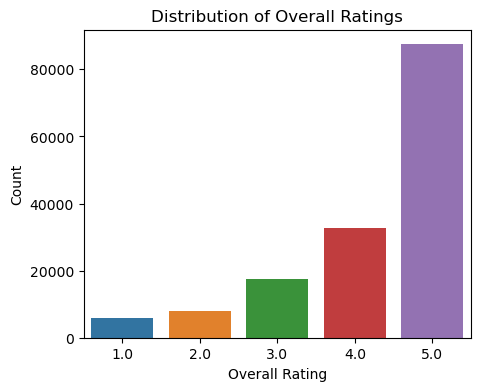

In [36]:
# Visualize the distribution of 'overall' ratings
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='overall')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()